<a name="capa"></a>

<hr>

<img src="images/CEFET-logo.png"  width="200" height="200">

<h1 style="text-align: center;"> Programa de Pós-graduação em Ciência da Computação </h1>
<h2 style="text-align: center;"> <u>Mineração de Dados (2020-T2)</u></h2>

<h3 style="text-align: center;"> Prof. Eduardo Ogasawara (eogasawara@cefet-rj.br) </h3>

<hr>

<h3 style="text-align: center;"> <u>Alunos:</u> </h3>
<h4 style="text-align: center;">Abel Soares de Queiroz Junior (abel.junior@aluno.cefet-rj.br) <br>
Janio de Souza Lima (abel.junior@aluno.cefet-rj.br) <br>
Luiz Augusto de Souza Perciliano (abel.junior@aluno.cefet-rj.br)</h4>


<hr>

<a name="rel_tec"></a><hr>

<p style="text-align: right;"> 
<a href="#capa"> Capa 📄 </a>
</p>

<h1 style="text-align: center;"> |📄| <u>Relatório Técnico</u> <a name="trab_1"></a> </h1> <br>

<h2 style="text-align: center;"> <u>Data Set - Incêndios Florestais no Brasil</u></h2>

<img src="images/DataSetKaggle.png">

<h4> <a href="https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil">https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil</a></h4>

<hr>



<a name="menu"></a><hr><hr>

<p style="text-align: right;"> 
<a href="#rel_tec"> Voltar para o topo 📄 </a>
</p>


<img src="images/MineracaodeDados.png" width="600" height="600">

<h3>  📙 <a href="#ana_exp">Análise Exploratória</a></h3>
<h3>  📙 <a href="#pre_pro">Pré-Processamento</a></h3>
<h3>  📙 <a href="#pad_fre">Padrões Frequentes</a></h3>
<h3>  📙 <a href="#pred">Predição</a></h3>
<h3>  📙 <a href="#agrup">Agrupamento</a></h3>

<hr>


<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

## Informações sobre o DataSet escolhido
<br>

<div align=justify>
Os incêndios florestais são um sério problema para a preservação das Florestas Tropicais. Compreender a frequência dos incêndios florestais em uma série temporal pode ajudar a tomar medidas para evitá-los. O Brasil tem a maior floresta tropical do planeta que é a floresta amazônica.<br>

Este conjunto de dados reporta o número de incêndios florestais no Brasil dividido por estados. A série compreende o período de aproximadamente 10 anos (1998 a 2017). Os dados foram obtidos no site oficial do governo brasileiro.
</div>
<hr>

In [1]:
#Bibliotecas Utilizadas
library(dplyr)
library(ggplot2)
library(forecast)

# Usar esta célular se for trabalhar com arquivos locais
# Editar e substituir pelo caminho correto
# setwd("E:/Users/janio/Documents/Education/Mestrado e Doutorado/CEFET/Disciplinas/1. Mineração de dados/Trabalho")

setwd("C:/0/MF/Documentos/R/Mineracao_de_Dados")
getwd()


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'forecast':
  method             from    
  fitted.fracdiff    fracdiff
  residuals.fracdiff fracdiff


[1] "C:/0/MF/Documentos/R/Mineracao_de_Dados"

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<div align=justify>
<b>Fonte dos dados:</b><h4> <a href="https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil?select=amazon.csv">https://www.kaggle.com/gustavomodelli/forest-fires-in-brazil?select=amazon.csv</a></h4>
</div><br>



In [2]:
#Carga dos dados
incendios = read.csv("amazon.csv")
head(incendios)

year,state,month,number,date
1998,Acre,Janeiro,0,1998-01-01
1999,Acre,Janeiro,0,1999-01-01
2000,Acre,Janeiro,0,2000-01-01
2001,Acre,Janeiro,0,2001-01-01
2002,Acre,Janeiro,0,2002-01-01
2003,Acre,Janeiro,10,2003-01-01


<a name="ana_exp"></a><hr>

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>


<h2> |📄| <u>Análise Exploratória</u> <a name="trab_1"></a> </h2> <br>

<img src="images/ana_exp.png" width="200" height="200"> <br>

<div align=justify>
As próximas células apresentam os dados básicos do dataset analisado
</div>

In [3]:
#Atributos
names(incendios)
sapply(incendios, class)

[1] "year"   "state"  "month"  "number" "date"

year     state     month    number      date 
"integer"  "factor"  "factor" "numeric"  "factor"

In [4]:
str(incendios)

'data.frame':	6454 obs. of  5 variables:
 $ year  : int  1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 ...
 $ state : Factor w/ 23 levels "Acre","Alagoas",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ month : Factor w/ 12 levels "Abril","Agosto",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ number: num  0 0 0 0 0 10 0 12 4 0 ...
 $ date  : Factor w/ 20 levels "1998-01-01","1999-01-01",..: 1 2 3 4 5 6 7 8 9 10 ...


<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<hr>

<div align=justify>

Na sumarização dos dados, conseguimos verificar o período de abrangência (year), bem como uma visão preliminar da distribuição das observações por mês e estado.
Estas informações serão melhor analisadas adiante, com algumas formas de agrupamento e geração de visualizações.

</div>

In [5]:
#Distribuição estatística dos dados
summary(incendios)

      year              state            month          number     
 Min.   :1998   Rio        : 717   Janeiro  : 541   Min.   :  0.0  
 1st Qu.:2002   Mato Grosso: 478   Abril    : 540   1st Qu.:  3.0  
 Median :2007   Paraiba    : 478   Agosto   : 540   Median : 24.0  
 Mean   :2007   Alagoas    : 240   Fevereiro: 540   Mean   :108.3  
 3rd Qu.:2012   Acre       : 239   Julho    : 540   3rd Qu.:113.0  
 Max.   :2017   Amapa      : 239   Junho    : 540   Max.   :998.0  
                (Other)    :4063   (Other)  :3213                  
         date     
 1998-01-01: 324  
 1999-01-01: 324  
 2000-01-01: 324  
 2001-01-01: 324  
 2002-01-01: 324  
 2003-01-01: 324  
 (Other)   :4510  

In [6]:
summary(incendios$number)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0     3.0    24.0   108.3   113.0   998.0 

In [7]:
#Consolidação dos dados por estados e mês
incend_resume <- incendios %>% 
  group_by(state, month) %>%
  summarize(count=sum(number, na.rm=TRUE))

incend_resume

state,month,count
Acre,Abril,41.000
Acre,Agosto,6393.034
Acre,Dezembro,47.000
Acre,Fevereiro,19.000
Acre,Janeiro,40.000
Acre,Julho,2296.000
Acre,Junho,257.000
Acre,Maio,81.000
Acre,Março,23.000
Acre,Novembro,708.000


<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<hr>

<div align=justify>
Análise gráfica dos dados originais
</div>

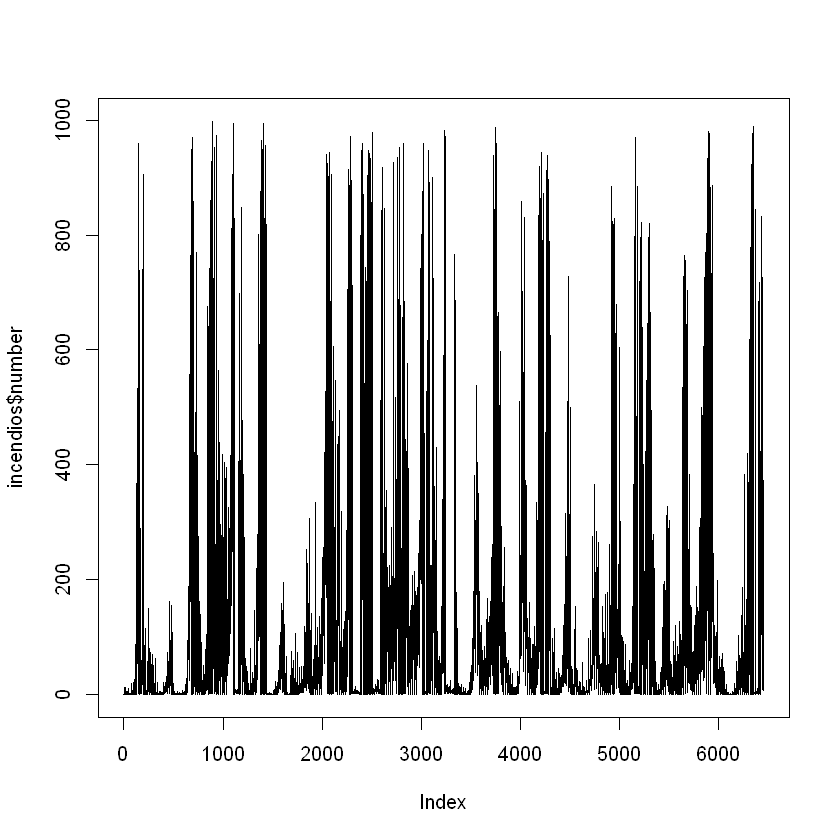

In [8]:
#Plotagem dos dados originais sem consolidação
plot(incendios$number, type="l")

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<hr>

<div align=justify>
Na visualização acima e na análise gráfica das características estatísticas dos dados (abaixo) ainda não foram realizados agrupamentos ou tratamentos dos dados, por isso, os temos com todos meses e estados juntos, sem uma organização que permita uma melhor análise exploratória do comportamento dos incêndios.
</div>

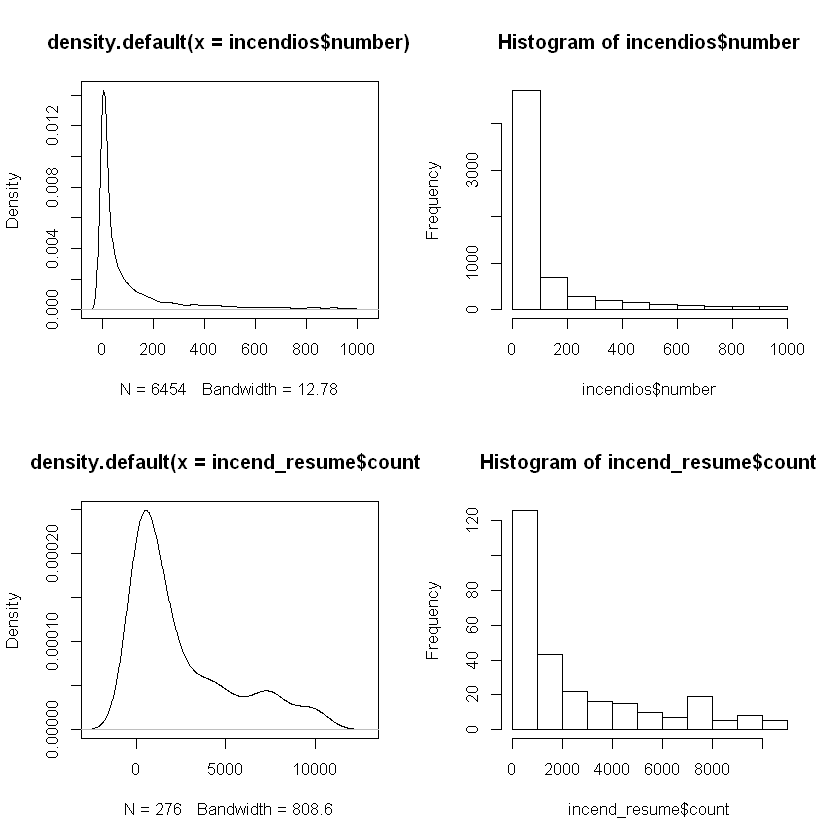

In [9]:
#Análise gráfico dos dados originais
par(mfrow=c(2,2))
den <- density(incendios$number)
plot(den)
hist(incendios$number)
den2 <- density(incend_resume$count)
plot(den2)
hist(incend_resume$count)
par(mfrow=c(1,1))

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<hr>

<div align=justify>

Aqui temos um primeiro agrupamento dos dados, por data, para permitir uma primeira visualização do comportamento dos incêndios ao longo do tempo. 

Nos tratamentos posteriores, serão realizadas outras formas de agrupamento e geração de visualização para melhor visualização das características dos dados e seu comportamento ao longo do tempo, por estado e a junçaõ da análise por tempo e por estado.

Por fim, serão realizadas consolidações/simplificações adicionais dos dados, modelando-os como uma série temporal que consolida a quantidade de incêndios no país, ao longo do tempo.
</div>

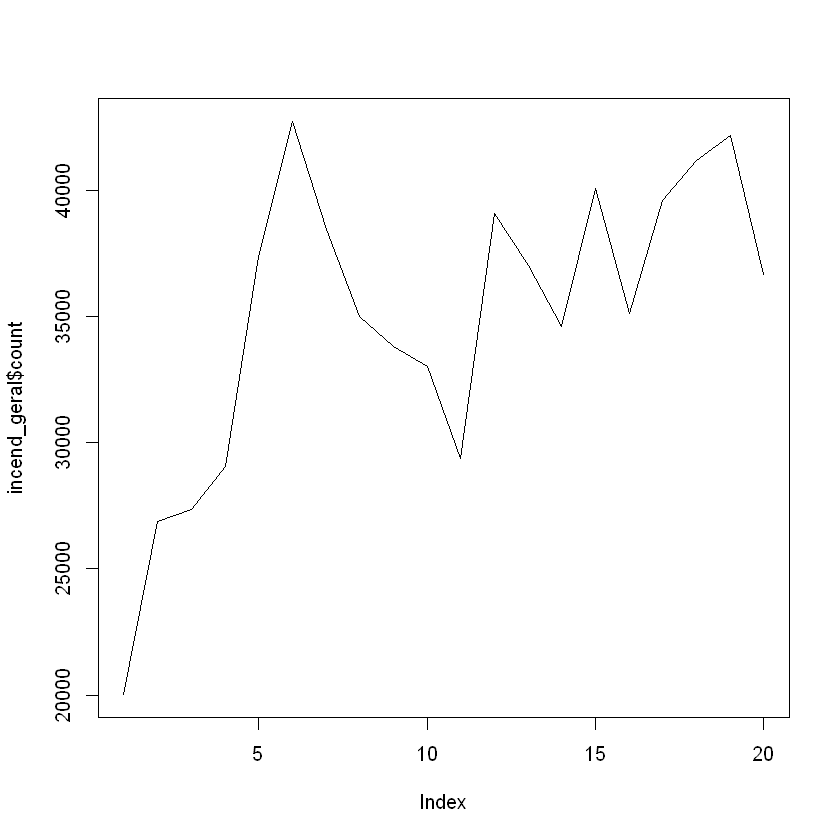

In [10]:
#Plotagem dos dados originais organizados por tempo
incend_geral <- incendios %>% 
  group_by(date) %>%
  summarize(count=sum(number, na.rm=TRUE))


plot(incend_geral$count, type="l")

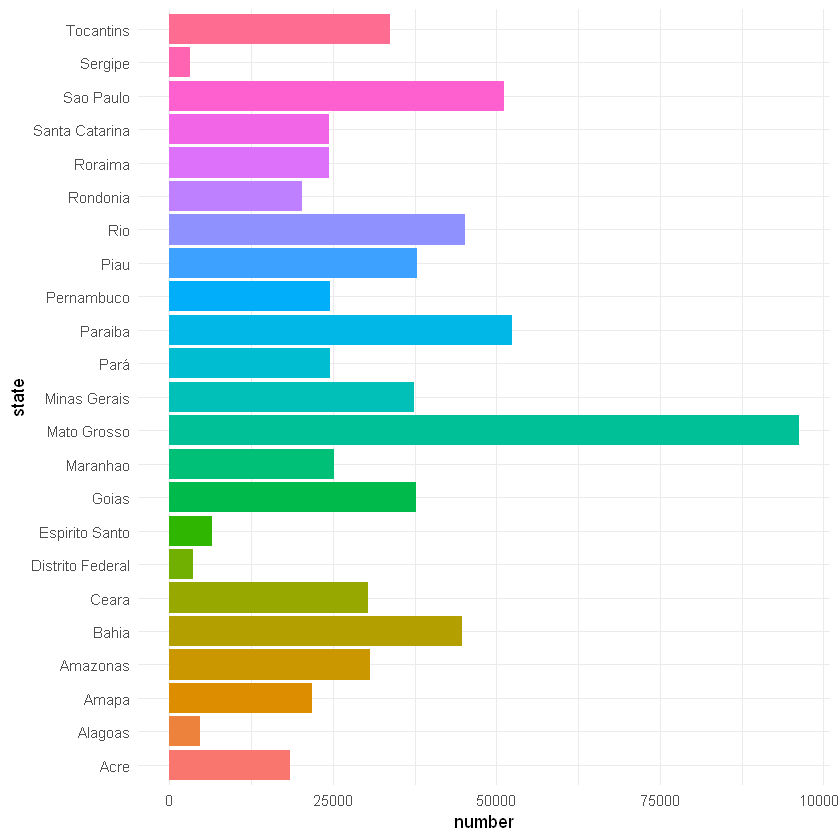

In [11]:
df <- incendios
por_anos <- df %>% group_by(year)
by_states <- df %>% group_by(state)
ggplot(data=by_states,aes(x=state,y=number)) + geom_col(aes(fill=state)) + coord_flip(
) + theme_minimal() +  theme(legend.position = "none") 

<a name="pre_pro"></a><hr>

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>




<h2> |📄| <u>Pré-processamento</u> <a name="pre_pro"></a> </h2> <br>

<img src="images/Pre-Processamento.png"> <br>

<div align=justify>
Pré-processamento dos dados e Continuação da análise exploratória
</div>

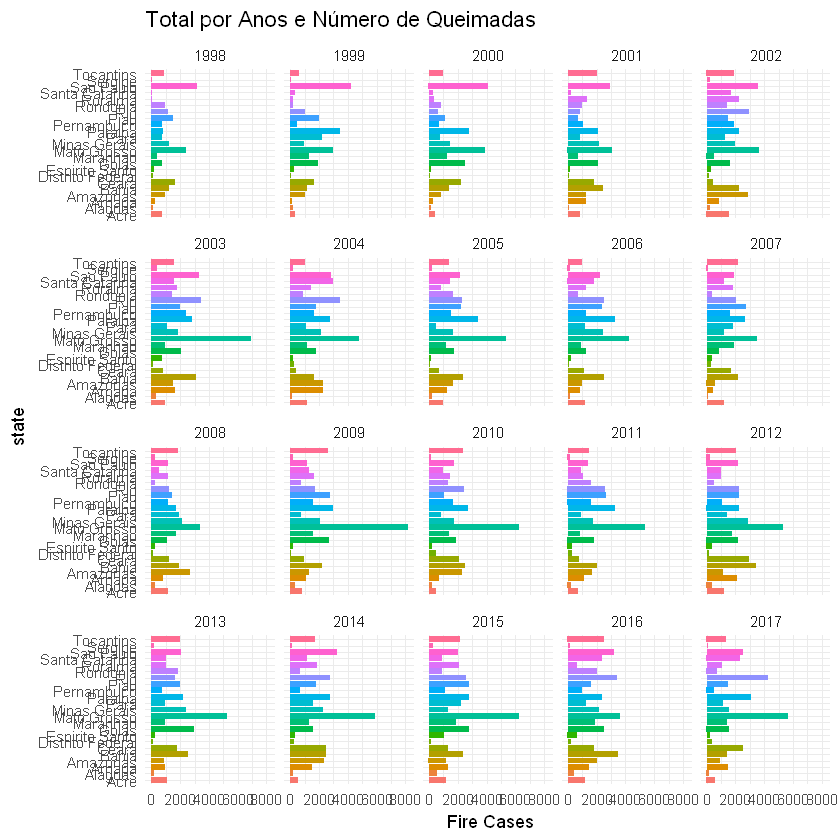

In [12]:
ggplot(data = by_states,aes(x=state,y=number)) + geom_col(aes(fill=state)) + 
  coord_flip() + facet_wrap(~year) +  theme(legend.position = "none") + 
ggtitle("Total por Anos e Número de Queimadas") +ylab(" Fire Cases") + 
theme_minimal() +  theme(legend.position = "none")

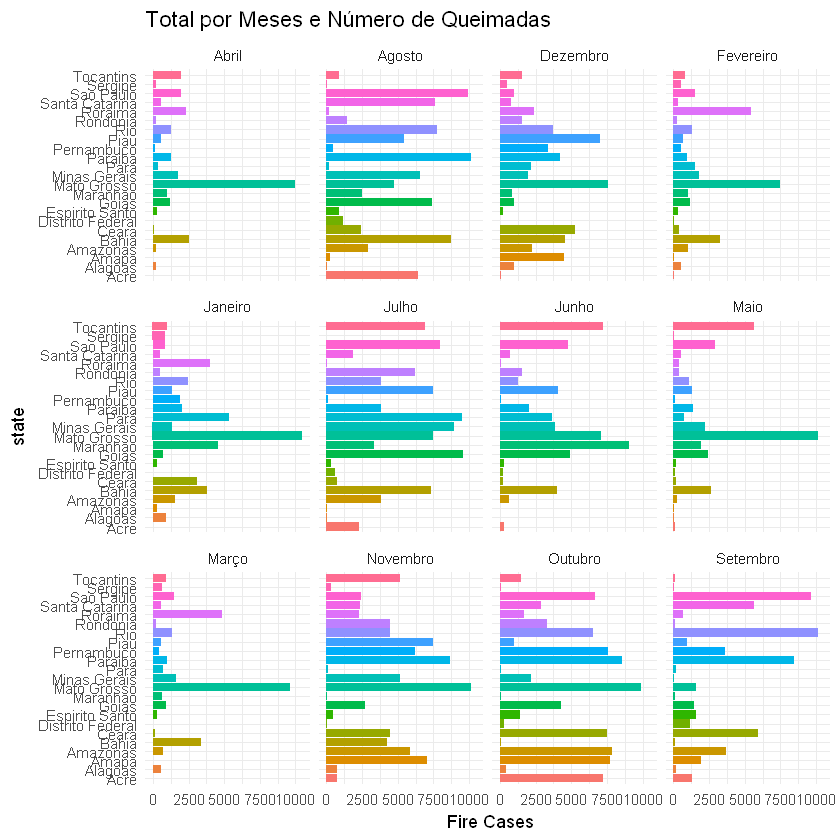

In [13]:
ggplot(data = by_states,aes(x=state,y=number)) + geom_col(aes(fill=state)) + 
  coord_flip() + facet_wrap(~month) +  theme(legend.position = "none") + 
ggtitle("Total por Meses e Número de Queimadas") +
ylab(" Fire Cases") + theme_minimal() +  theme(legend.position = "none")

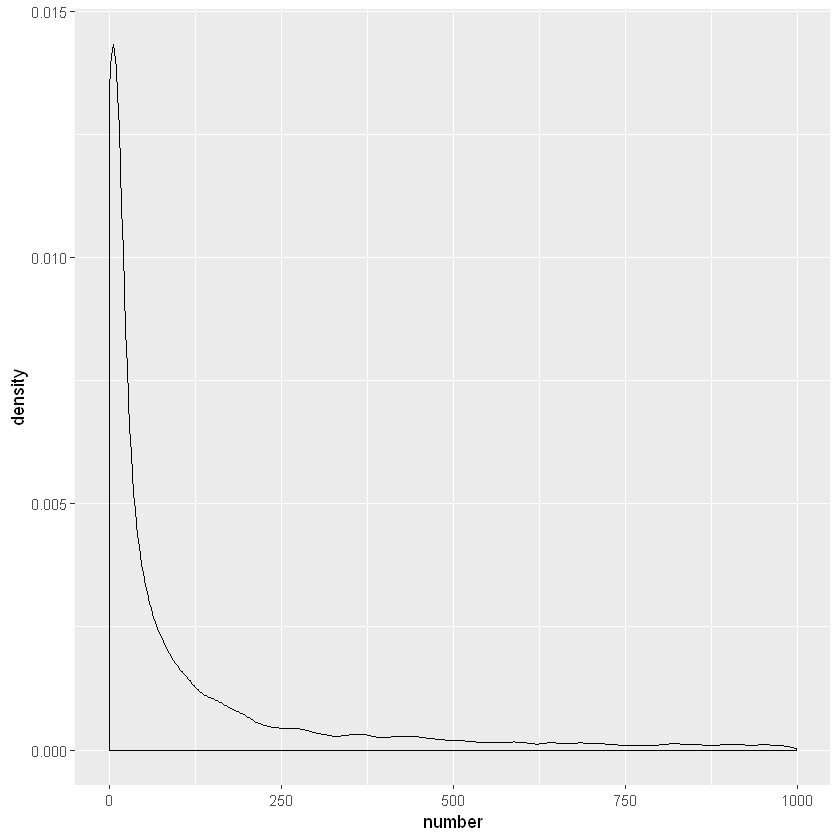

In [14]:
#Número de casos relatados ao longo do tempo
ggplot(data=df,aes(x=number)) + geom_density()

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<hr>

<div align=justify>
Neste ponto é apresentada uma visão gráfica da distribuição dos dados por estado com uma análise simplificada de <b>outliers</b> através do gráfico <b>boxplot</b>.
</div>

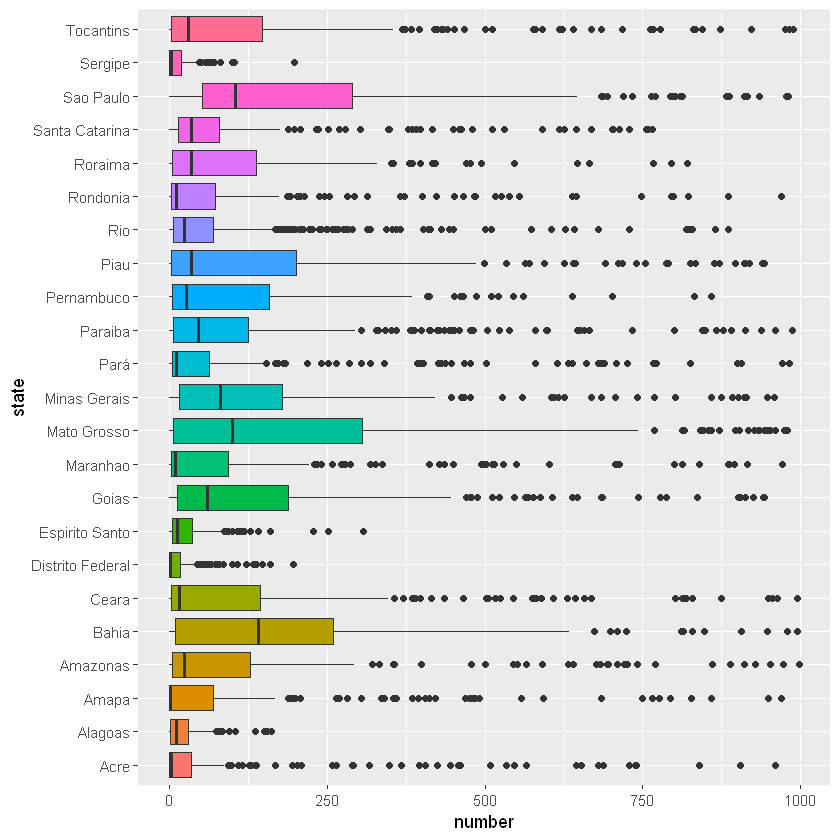

In [15]:
#Esta distribuição está com altíssimos outileiers
ggplot(data = df,aes(x=state,y=number)) + geom_boxplot(aes(fill=state)) + 
theme(legend.position = "none") + coord_flip()

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<hr>

<div align=justify>
As visualizações a seguir continuam a exploração dos dados por estado e por tempo (ano e mês), apresentando períodos e locais de maior concentração dos incêndios.
</div>

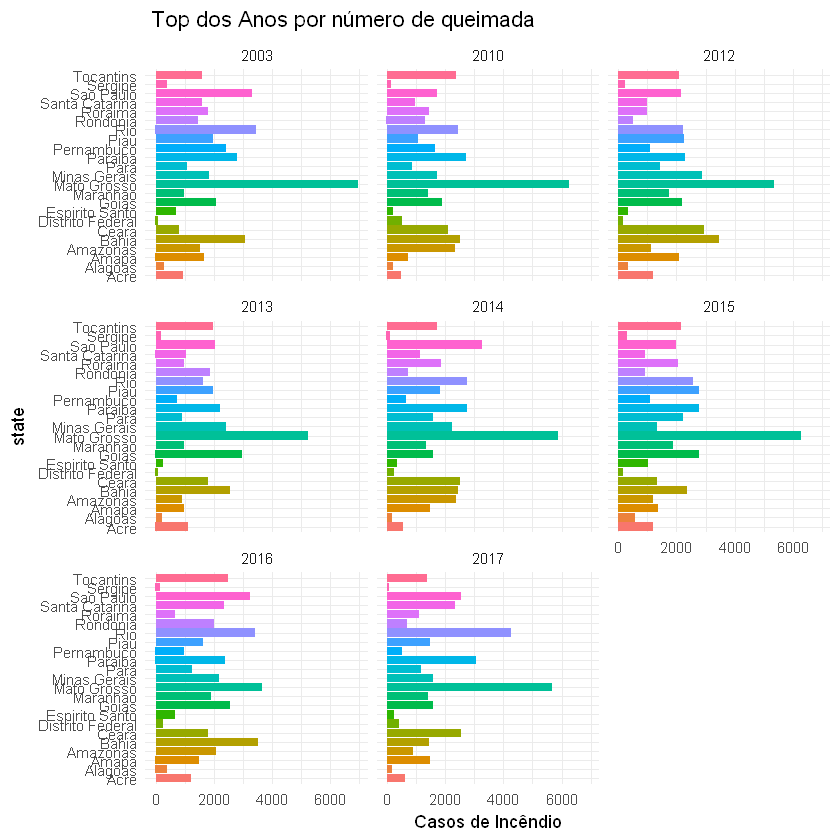

In [16]:
top.years <- summarise(.data=por_anos,
                       ocorrencia_fogo = mean(number,trim = 0.4),
                       Median_value=median(number))  %>% arrange(desc(ocorrencia_fogo)) %>% filter(ocorrencia_fogo > 30) %>% select(year) %>% pull()

top.years.fires <-  filter(.data = por_anos, year %in% top.years)
ggplot(data = top.years.fires,aes(x=state,y=number)) + geom_col(aes(fill=state)) + 
  coord_flip() + facet_wrap(~year) +  theme(legend.position = "none") +
ggtitle(" Top dos Anos por número de queimada") +ylab("Casos de Incêndio") + theme_minimal() +  theme(legend.position = "none")

In [17]:
# Meses com maior número de incêndios
top.months <- df %>% group_by(month) %>%  summarise(
    Trimmed_Mean_Fire_Cases=mean(number,trim = 0.4 ),
    Median_Value=median(number)) %>% arrange(desc( Trimmed_Mean_Fire_Cases))  %>%  filter(Trimmed_Mean_Fire_Cases > 30) %>% select(month) %>% pull()

top.months.df <- df %>% filter(month %in% top.months)

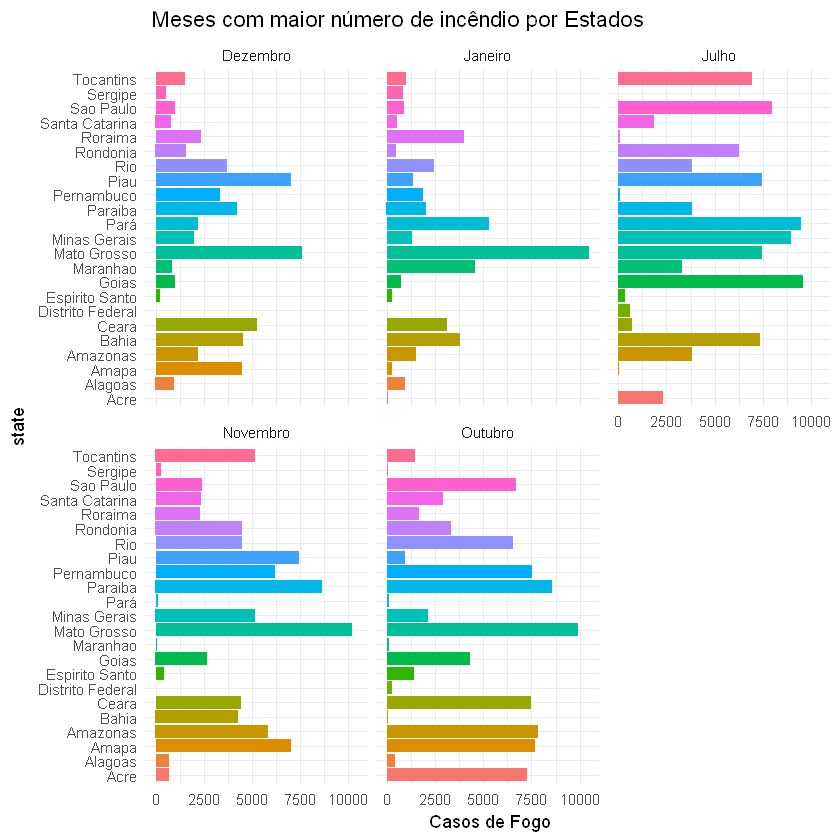

In [18]:
ggplot(data = top.months.df,aes(x=state,y=number)) + geom_col(aes(fill=state)) + coord_flip() + facet_wrap(~month) +  
  theme(legend.position = "none") + 
ggtitle(" Meses com maior número de incêndio por Estados") +
ylab(" Casos de Fogo") +  theme_minimal() +  theme(legend.position = "none")

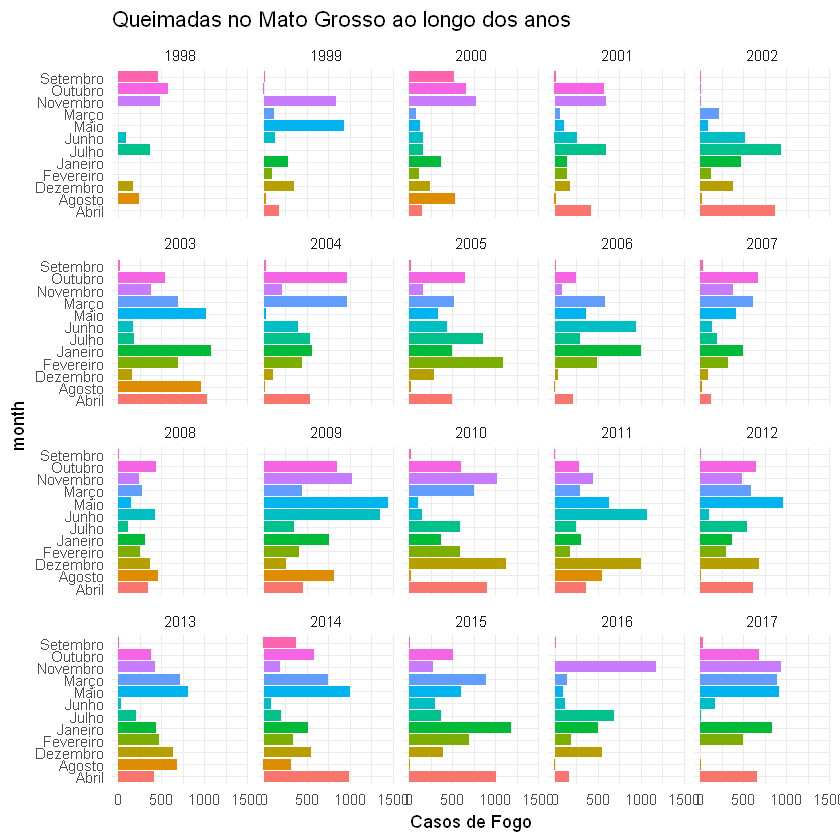

In [19]:
ggplot(data = filter(.data = df ,state == 'Mato Grosso' ),
       aes(x=month,y=number)) + geom_col(aes(fill=month))+ coord_flip() + facet_wrap(~year) +
  theme(legend.position = "none") + ggtitle("Queimadas no Mato Grosso ao longo dos anos") +
ylab("Casos de Fogo") +  theme_minimal() +  theme(legend.position = "none")

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<hr>

<div align=justify>

A partir deste ponto é realizado novo agrupamento dos dados, consolidando os incêndios do país para <b>análise do dataset como uma série temporal</b>, para aplicação de técnicas de mineração de dados em séries temporais.
    
</div>

In [20]:
#Organização temporal dos dados e conversão de campos texto (month) em numérico
#Ajuste do atributo month (mês) como um fator organizado pelos meses do ano
levels <- c("Janeiro",
                 "Fevereiro",
                 "Março",
                 "Abril",
                 "Maio",
                 "Junho",
                 "Julho",
                 "Agosto",
                 "Setembro",
                 "Outubro",
                 "Novembro",
                 "Dezembro")

incendios$month <- factor(incendios$month, levels=levels, ordered=TRUE)

In [21]:
#Organização temporal dos dados e conversão de campos texto (month) em numérico
#Uso do atributo month com o ajuste da célula anterior para criação de um novo atributo com inteiros representando os meses
incendios$monthN <- as.integer(incendios$month)

incendios

year,state,month,number,date,monthN
1998,Acre,Janeiro,0,1998-01-01,1
1999,Acre,Janeiro,0,1999-01-01,1
2000,Acre,Janeiro,0,2000-01-01,1
2001,Acre,Janeiro,0,2001-01-01,1
2002,Acre,Janeiro,0,2002-01-01,1
2003,Acre,Janeiro,10,2003-01-01,1
2004,Acre,Janeiro,0,2004-01-01,1
2005,Acre,Janeiro,12,2005-01-01,1
2006,Acre,Janeiro,4,2006-01-01,1
2007,Acre,Janeiro,0,2007-01-01,1


<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<hr>

<div align=justify>

Criação da série temporal com agrupamento dos dados por mês e ano
    
</div>



In [22]:
incend_geral <- incendios %>% 
  group_by(monthN, year) %>%
  summarize(count=sum(number, na.rm=TRUE))

head(incend_geral)

monthN,year,count
1,1998,0
1,1999,1081
1,2000,778
1,2001,547
1,2002,1654
1,2003,5091


In [23]:
#Ordenar coluns por tempo
incend_geral <- arrange(incend_geral, incend_geral$year, incend_geral$monthN)

#Incluir coluna time geral
incend_geral$time <- c(1:length(incend_geral$count))

<p style="text-align: right;"> 
<a href="#rel_tec"> Voltar para o topo 📄 </a>
</p>

<hr>

<div align=justify>
Visualização da série temporal original
</div>


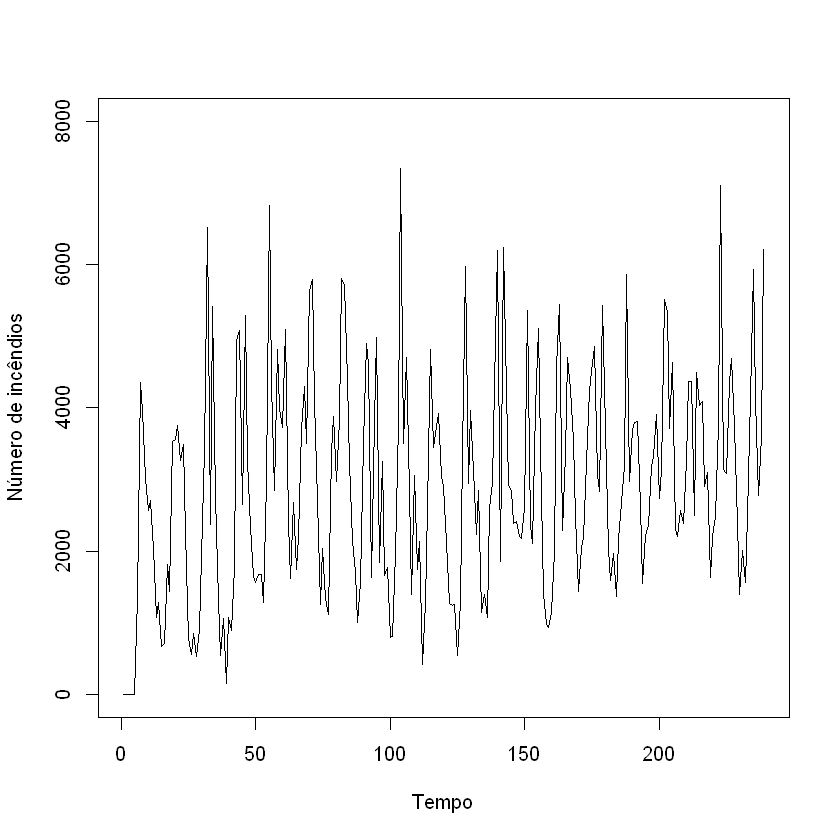

In [24]:
#Análise de dados processados
plot(incend_geral$count, type="l", ylim = c(0,8000), xlab="Tempo", ylab="Número de incêndios")

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<hr>

<div align=justify>
Análise gráfica das características estatísticas dos dados (abaixo) após realizados agrupamentos. Tem-se agora uma organização que permite uma melhor análise exploratória do comportamento dos incêndios com técnicas de mineração de dados em séries temporais.
</div>

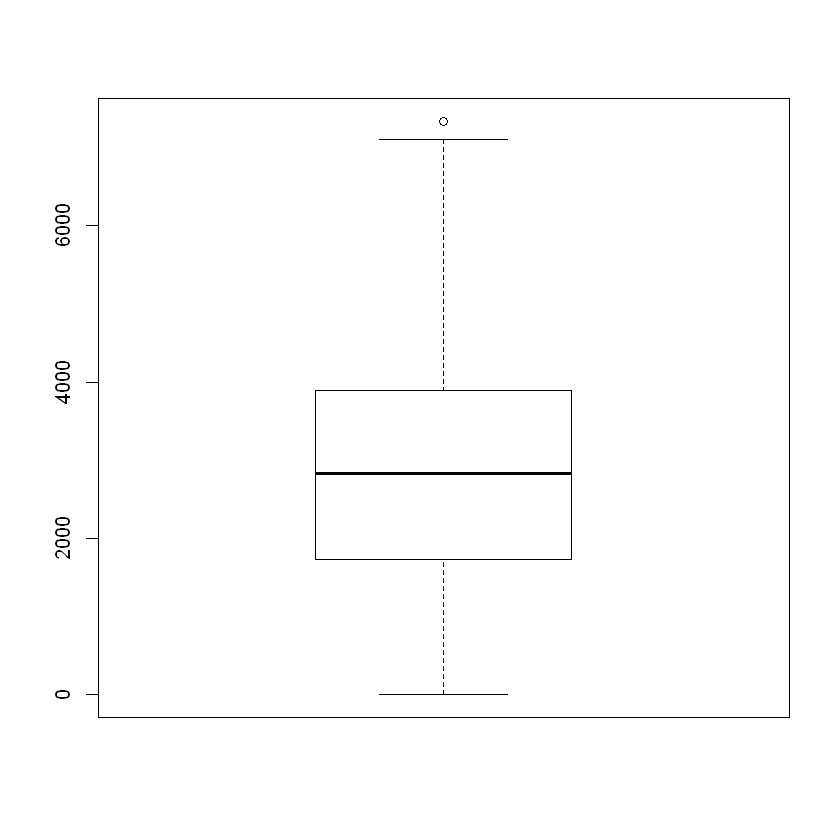

In [25]:
boxplot(incend_geral$count)

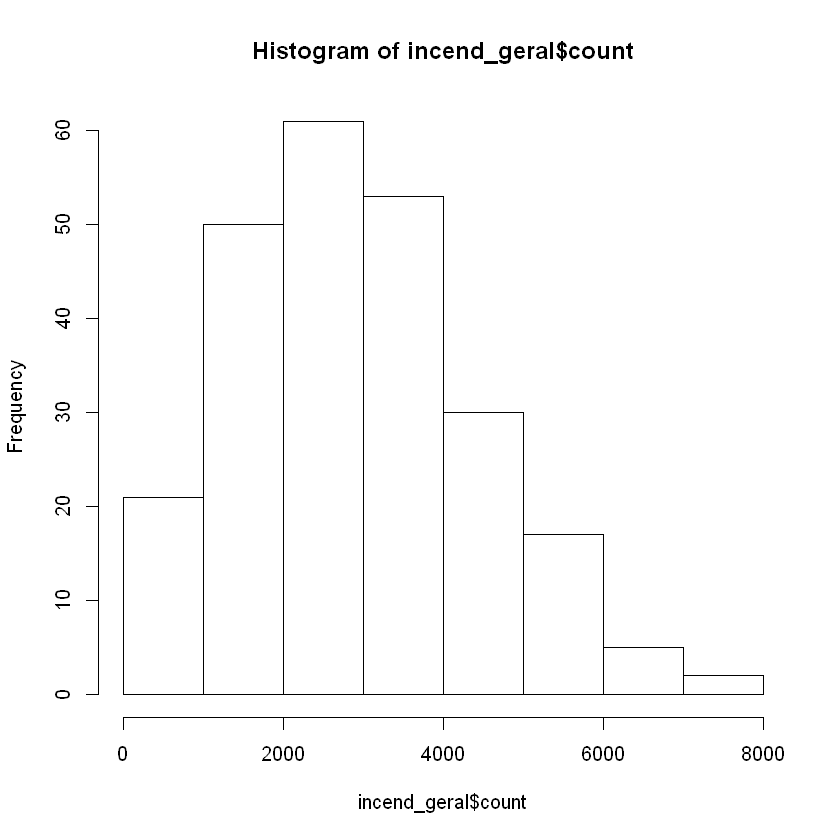

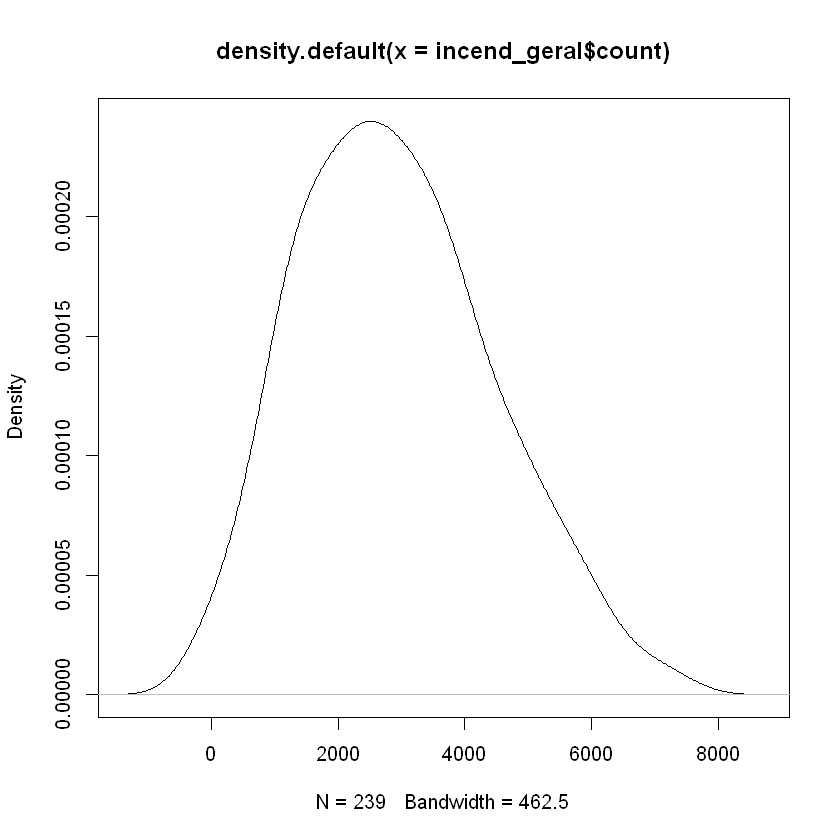

In [26]:
hist(incend_geral$count)
plot(density(incend_geral$count))

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<hr>

<div align=justify>
Antes de iniciar a aplicação de técnicas de detecção de eventos e predição de próximos valores na série temporal, apresenta-se a seguir uma análise visual dos outliers na série temporal original, baseada apenas na análise dos valores gerados pelo <b>boxplot</b>.
</div>


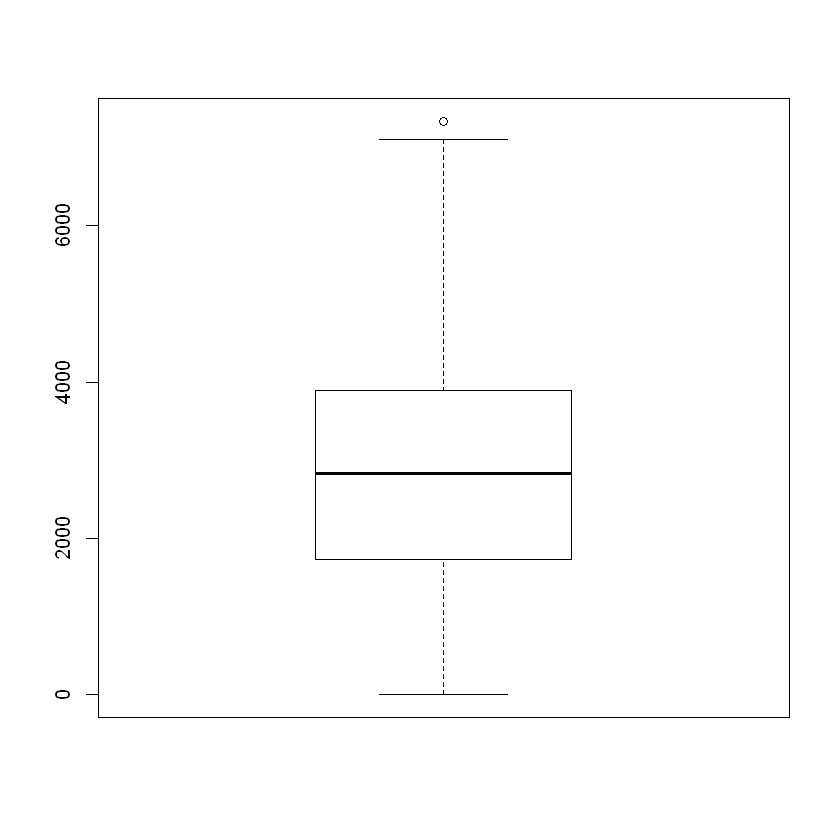

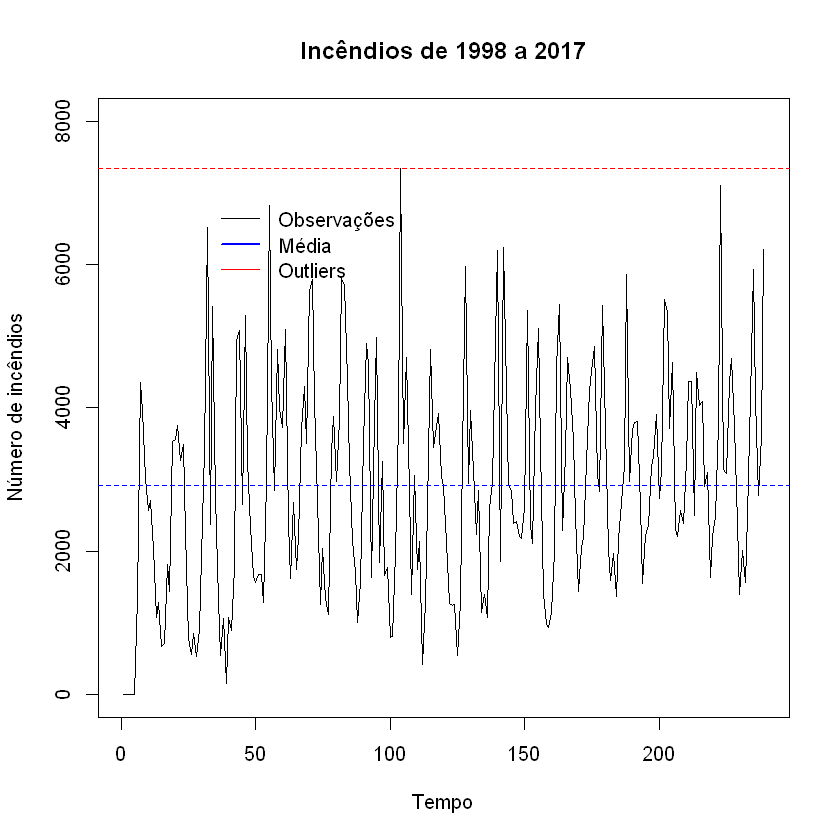

In [27]:
#Análise visual de outliers baseada apenas no boxplot
#================================================
bp <- boxplot(incend_geral$count)
out <- bp$out #Outliers identificado pelo boxplot

#Plotagem da série temporal, média e outlier
plot(incend_geral$count, type="l", ylim = c(0,8000),
     ylab = "Número de incêndios",
     xlab = "Tempo",
     main = "Incêndios de 1998 a 2017")
abline(h = mean(incend_geral$count), col = "blue", lty = 2)
abline(h = out, col = "red", lty = 2)
legend(x=30, y=7000, legend=c("Observações", "Média", "Outliers"), lwd=c(1,2),
       col = c("black", "blue", "red"), bty = "n")

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<hr>

<div align=justify>

O comportamento da série temporal e portanto os resultados da aplicação de técnicas de detecção de eventos ou predição de valores futuros é afetada por características dos dados, conhecidos como componentes sazonal e tendência.
Em razão disto, apreseta-se a seguir a decomposição da série original para identificação destes componentes (sazonal, tendência e ruído aleatório*).

*A série original sem o efeito de sazonalidade e tendência.
</div>

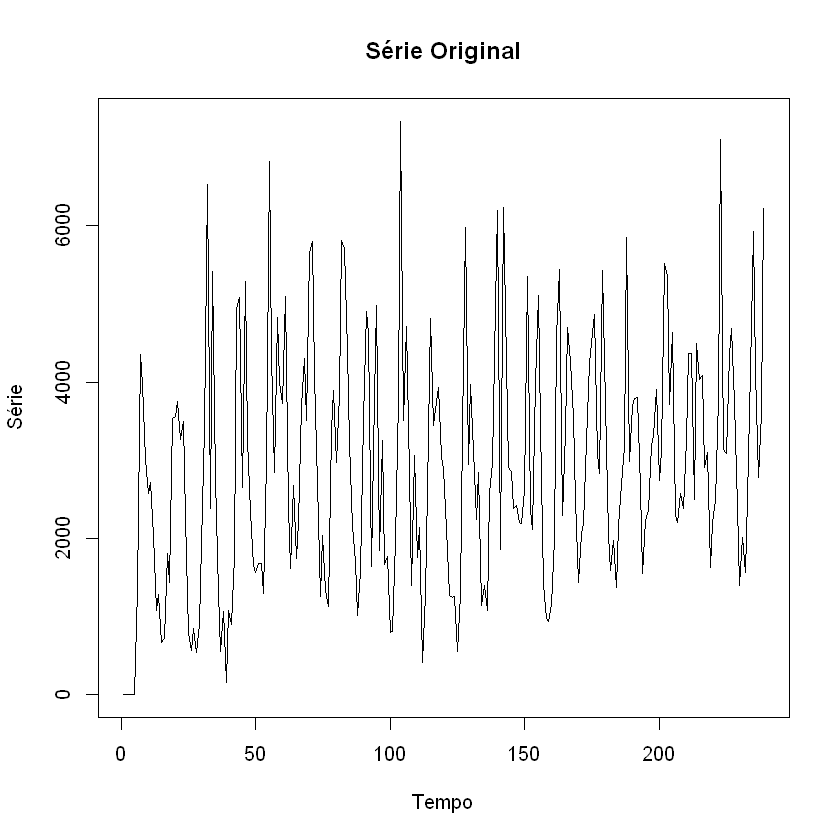

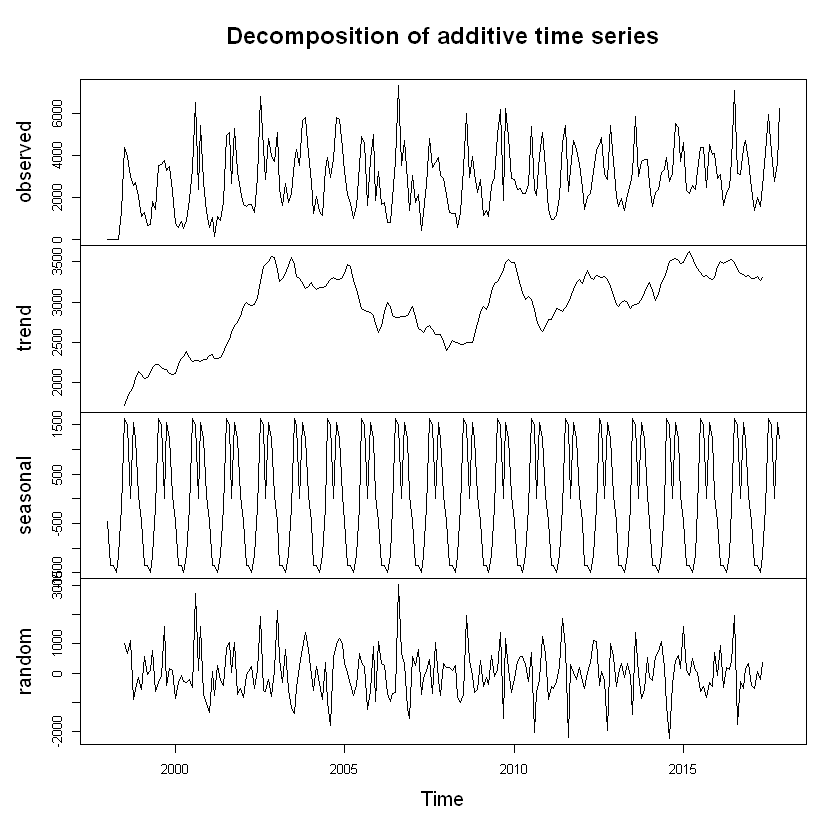

In [28]:
#Decomposição dos componentes da série temporal
#================================================
data <- incend_geral$count

tsdata <- ts(data,
             start=c(1998, 1),
             frequency=12)

#Visualização da série original
plot.ts(data, main="Série Original", xlab="Tempo", ylab="Série")

#Decomposição dos componentes da série (observações, tendência, sazonal e ruídos)
decomp <- decompose(tsdata, type = "additive")
plot(decomp)

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<hr>

<div align=justify>

Note-se, que mesmo antes da aplicação de outras técnicas de mineração na série temporal que serão vistas a seguir, a visualização dos componentes decompostos, já permite uma análise visual para interpretar o comportamento da série temporal ao longo do tempo.

Por exemplo, pode-se perceber uma tendência de crescimento comparando-se o início da série com seu final. Isso ocorre, apesar de variações ao longo do tempo de altas e quedas e de um crescimento mais acentuado nas primeiras ocorrências até o início dos anos 2000, seguido por uma tendência de queda mais suave, mas que se prolongou até um pouco antes dos anos 2010. Após este período, a série passa a ter períodos mais curtos de queda e alta, até chegar ao final da série em um patamar bem superior ao início da série.

O componente sazonal, por sua vez, da forma exibida no gráfico de decomposição, permite uma análise explícita do comportamento repetitivo da série ao longo dos anos. Este tipo de informação é relevante para a área de domínio, pois releva um padrão que poderia estar oculto nos dados originais. A revelação deste tipo de padrão oculta, permite tomada de decisões mais assertivas baseadas em dados.
</div>

<a name="pad_fre"></a><hr>

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>


<h2> |📄| <u>Padrões Frequentes</u> <a name="pad_fre"></a> </h2> <br>

<img src="images/Padroes_Frequentes.png" width="300" height="300"> <br>

<div align=justify>

Continuando o processo de mineração de dados na série temporal, a seguir tem-se a repetição da análise mais simples de detecção de <b>outliers</b> baseadas apenas na análise dos números gerados pelo gráfico *boxplot*. Contudo, desta vez, a análise é realizada nos dados ajustados, removendo o efeito sazonal e a tendência. Isto é possível, pelo uso do resultado da decomposição realizada na etapa anterior.
<br>    
Na visualização a seguir, os dados <b>plotados</b> primeiramente estão ajustadas apenas pela remoção do componente sazonal, ou seja, ainda tem a tendência vista anteriormente.
    
</div>

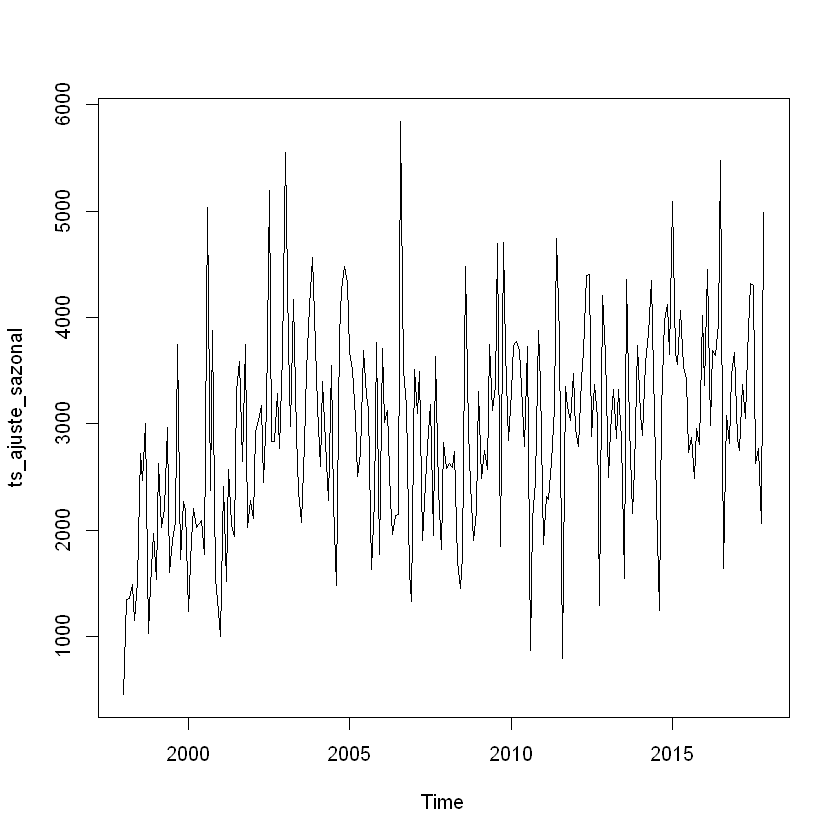

In [29]:
#Série sem o componente sazonal
ts_ajuste_sazonal <- data - decomp$seasonal
plot(ts_ajuste_sazonal)

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<hr>

<div align=justify>

A análise de outlier sem o componente sazonal não diferenciou-se muito da mesma análise com os dados original, permanecendo a identificação de apenas um <b>outlier</b> e em um patamar relativamente similar (na parte superior dos dados e aproximadamente na metade do tempo da série analisada).
</div>

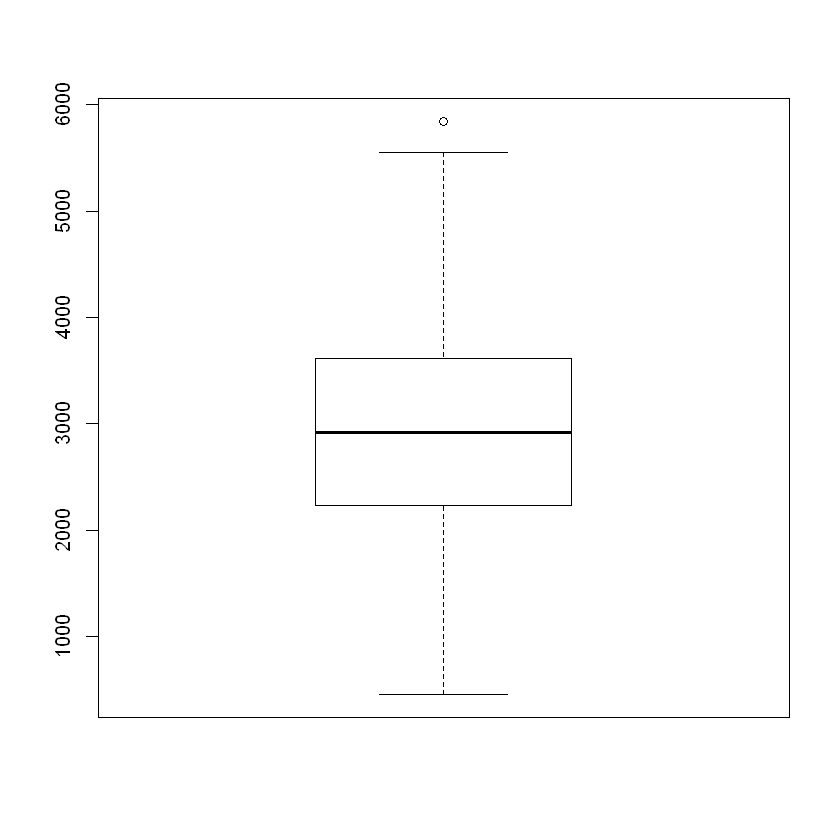

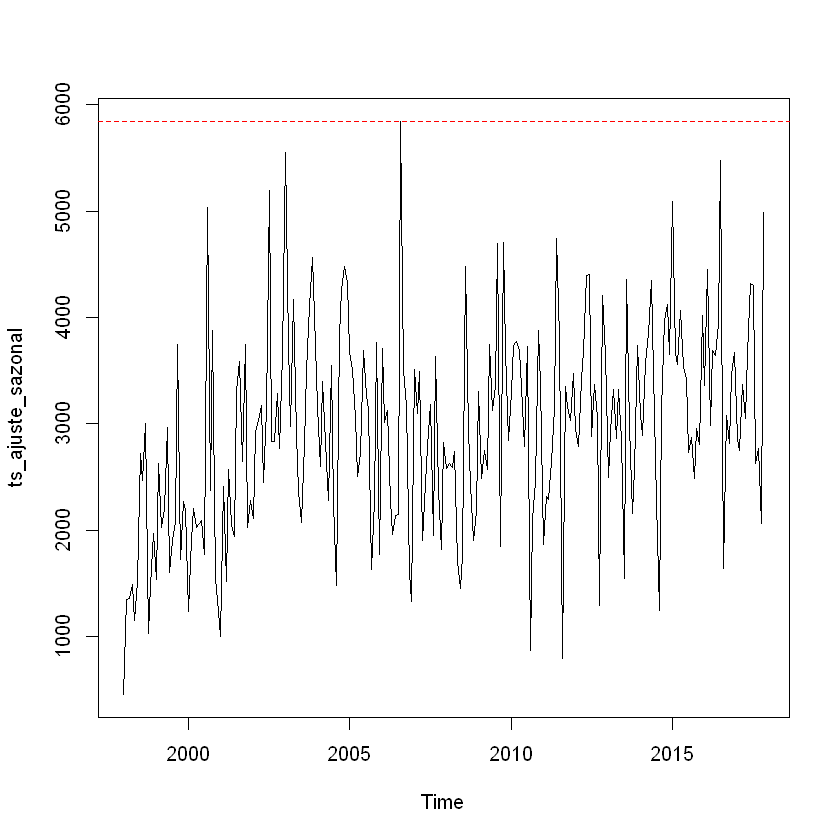

In [30]:
#Análise outlier na série sem componente sazonal
bp_as <- boxplot(ts_ajuste_sazonal)
plot(ts_ajuste_sazonal)
abline(h = bp_as$out, col = "red", lty = 2)
legend(x=2000, y=7000, legend=c("Observações", "Outliers"), lwd=c(1,2),
       col = c("black", "red"), bty = "n")

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<hr>

<div align=justify>
Continuando a análise é feita remoção tanto do componente sazonal quanto do componente tendência.
Os dados plotados neste momento, representam o comportamento aleatório da série.
</div>

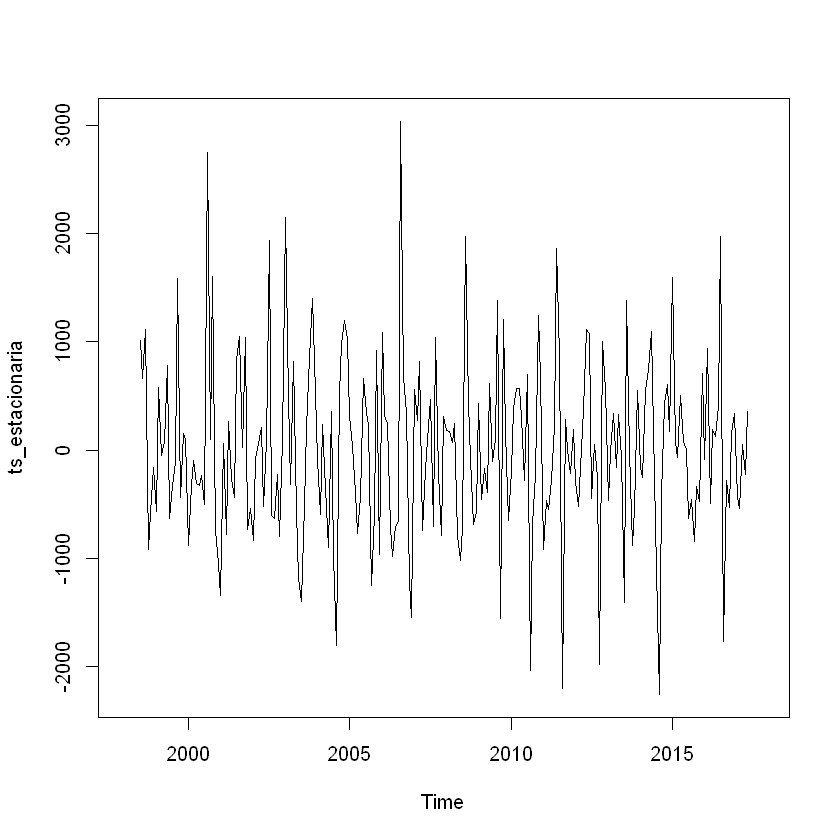

In [31]:
#Série temporal transformada (sem comp. sazonal e tendência)
ts_estacionaria <- ts_ajuste_sazonal - decomp$trend

plot(ts_estacionaria)

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<hr>

<div align=justify>
Percebe-se que ao repetir-se a análise de outliers, consegue-se identificar nestes dados ajustados uma quantidade maior de ocorrências identificadas. Além disso, a detecção de *outliers* parece mais sensível, conseguindo identificar pontos mais distribuídos ao longo do tempo e em patamares diferentes das observações. Como a análise foi realizada de uma maneira simplificada e não há dados de referência para cálculo de métricas para validar se os outliers identificadas representariam eventos reais na série temporal, não é possível concluir que este seria um modelo adequado de detecção de eventos, mas os dados preliminares podem ao menos indicar uma capacidade maior de controle ou análise da estabilidade dos dados ao longo do tempo.
</div>

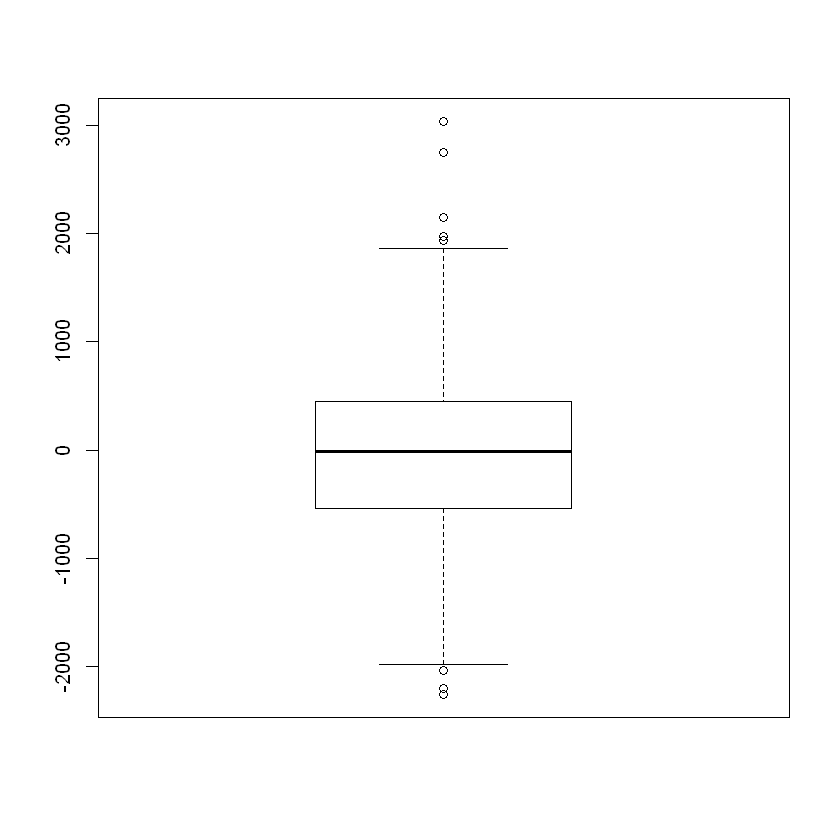

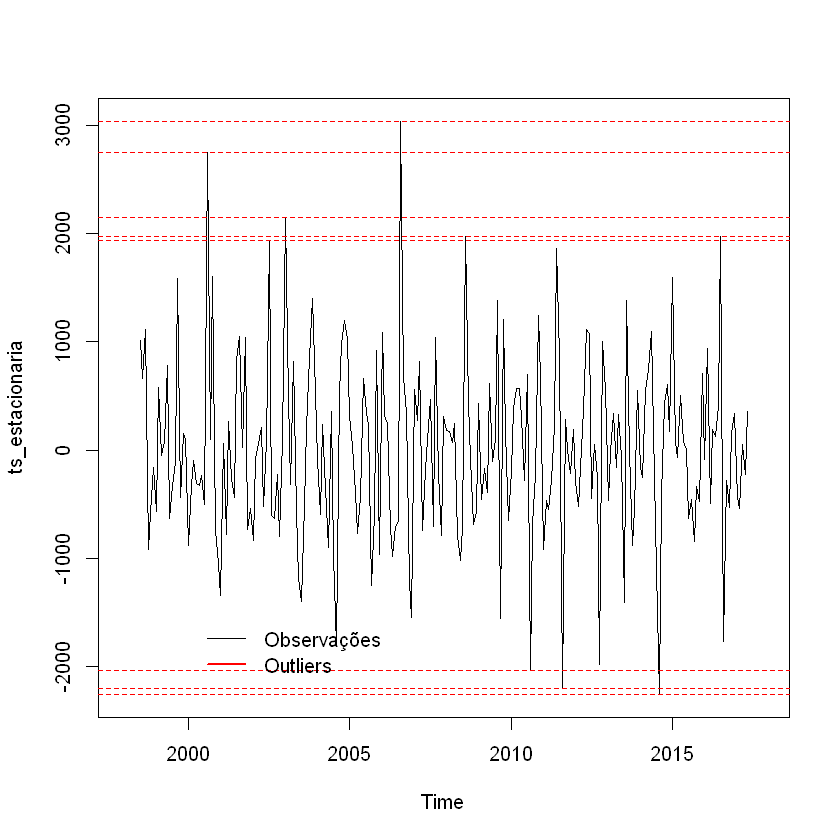

In [32]:
bp_es <- boxplot(ts_estacionaria)
plot(ts_estacionaria)
abline(h = c(bp_es$out), col = "red", lty = 2)
legend(x=2000, y=-1500, legend=c("Observações", "Outliers"), lwd=c(1,2),
       col = c("black", "red"), bty = "n")

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<hr>

<div align=justify>
A seguir são realizadas minerações adicionais, que seguem a linha da análise experimental de identificação de eventos na série temporal apresentadas anteriormente. Contudo, desta vez são usados métodos avaliados e implementados no Framework Harbinger. Uma vez que este framework tem objetivo de integração e avaliação de métodos de detecção de eventos (Salles et al. 2020)(1) e usa métodos de detecção baseadas em algoritmos desenvolvidos com rigor científico e bem estabelecidos na área de mineração de séries temporais, entende-se que as detecção de evento tem uma maior capacidade de apresentar qualidade nos resultados do que a análise experimental realizada anteriormente.

<br>
    
(1) https://sbbd.org.br/2020/wp-content/uploads/sites/13/2020/09/Harbinger-ST5.pdf
    
</div>

In [33]:
#Detecção de eventos
#Framework Harbinger
source( "https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/harbinger.R" )
library("tseries")
test <- subset(incend_geral, select=c(time, count))

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<hr>

<div align=justify>
Nas detecções de evento realizadas a partir deste ponto, foi usada a série temporal original (sem remoção dos componentes sazonal e de tendência). A interpretação gráfica dos resultados deve ser feita considerando que os pontos detectados são os pontos em vermelho, enquanto a série original está plotada em preto. Adicionalmente, quando o método de detecção identifica pontos de mudança no comportamento da série temporal é plotada uma reta cinza tracejada.
</div>

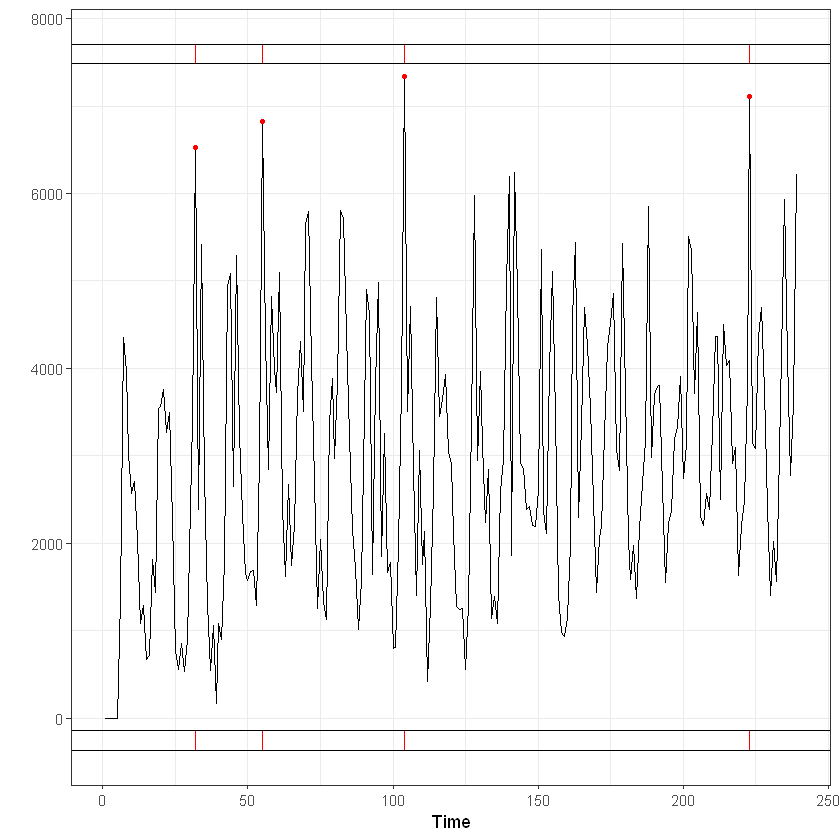

In [34]:
#Adaptive Normalization Outliers
#Detect
events_an <- evtdet.an_outliers(test,w=30,alpha=1.5,na.action=na.omit)

#Plot
print(evtplot(test, events_an, mark.cp = TRUE))

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<hr>

<div align=justify>
Note-se que o método anterior (Adaptive Normalization Outliers) teve a concentração de identificação de pontos na parte superior do gráfico, de maneira similiar à análise de outliers realizada através dos dados do *boxplot*, contudo identificou pontos adicionais. Este comportamento pode estar relacionado ao uso pelo método da normalização adaptativa que realiza um processo baseado em janelas deslizantes e médias móveis e, portanto, é mais sensível ao comportamento de séries temporais não estacionárias (Ogasawara 2010).
</div>

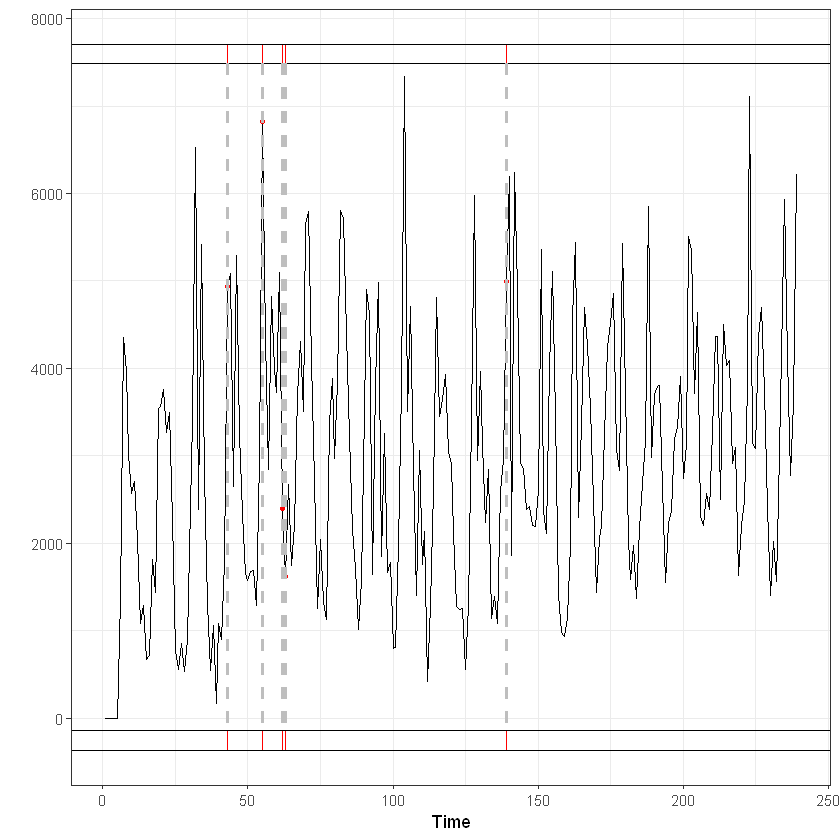

In [35]:
#====== Seminal Change Point (1999) ======
#Detect
events_scp <- evtdet.seminalChangePoint(test, w=30, na.action=na.omit)

#Plot
#print(evtplot(test,events_scp, reference))
print(evtplot(test, events_scp, mark.cp = TRUE))

In [36]:
#====== Change Finder (2005) ======
#Detect
ARIMA <- function(data) forecast::auto.arima(data)
linreg <- function(data) {
  #browser()
  data <- as.data.frame(data)
  colnames(data) <- "x"
  data$t <- 1:nrow(data)
  #Adjusting a linear regression to the whole window
  lm(x~t, data)
}

In [37]:
# ERRO!!!!!!!!!!!!!!

#Detect - change finder com modelo arima
#events_cf_arima <- evtdet.changeFinder(test,mdl=ARIMA,m=5,na.action=na.omit)

#print(evtplot(test,events_cf_arima, mark.cp=TRUE))

In [38]:
# ERRO!!!!!!!!!!!!!!

#Detect - change finder com modelo regressão linear
#events_cf_linreg <- evtdet.changeFinder(test,mdl=linreg,m=5,na.action=na.omit)

#print(evtplot(test,events_cf_linreg, mark.cp=TRUE))

<a name="pred"></a><hr>

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>


<h2> |📄| <u>Predição</u> <a name="pred"></a> </h2> <br>

<img src="images/prediction.png" width="300" height="300"> <br>

<div align=justify>

**Mineração de Série Temporais**

**Predição de próximas observações**
    
Retornando à análise da série temporal com ajustes do componente sazonal, a seguir é apresentada uma análise da série temporal com objetivo de prever observações futuras. Essa previsão foi realizada com base da técnica de suavização denominada Holt que é adequada para análise de séries temporais com presença de tendência (Barros et al. 2020).
    
Inicialmente é gerado o modelo e plotados os valores ajustados (vermelho) em conjunto com as observações originais (preto).
    
</div>

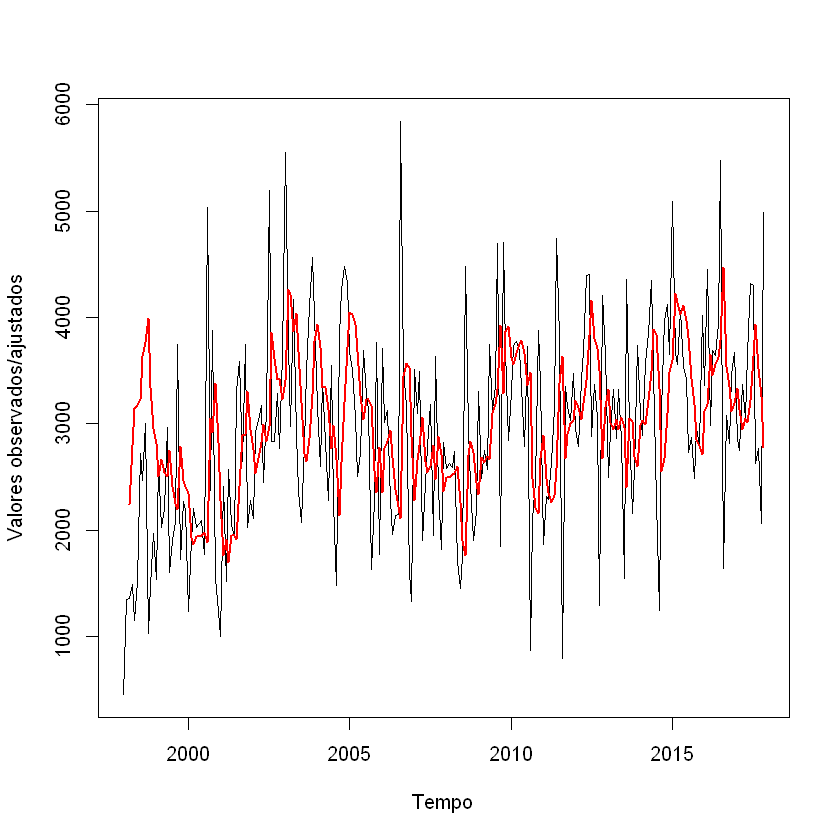

In [39]:
#Análise da série por suavização exponencial de holt
ajuste_holt <- HoltWinters(ts_ajuste_sazonal, gamma = FALSE)
#ajuste_holt

#Valores ajustados
plot(ts_ajuste_sazonal, xlab = "Tempo", ylab = "Valores observados/ajustados")
lines(fitted(ajuste_holt)[,1], lwd = 2, col = "red")

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<hr>

<div align=justify>

A seguir o modelo gerado pode ser usado para predição das próximas ocorrências da série temporal.
Neste exemplo foi gerada inicialmente uma predição para as próximas 12 ocorrências da série, cujo resultado está apresentado de maneira numérica e posteriormente gerada a visualização dos pontos previstos junto com a série original.
</div>


In [40]:
#Previsão de próximas 12 ocorrências
prev_holt <- forecast(ajuste_holt, h=12, level=95)
prev_holt

         Point Forecast     Lo 95    Hi 95
Dec 2017       3539.186 1533.0429 5545.328
Jan 2018       3570.454 1424.4142 5716.495
Feb 2018       3601.723 1288.2330 5915.214
Mar 2018       3632.992 1125.8706 6140.114
Apr 2018       3664.261  939.0901 6389.432
May 2018       3695.530  729.7693 6661.291
Jun 2018       3726.799  499.7256 6953.872
Jul 2018       3758.068  250.6247 7265.511
Aug 2018       3789.337  -16.0551 7594.729
Sep 2018       3820.606 -299.0249 7940.236
Oct 2018       3851.875 -597.1711 8300.920
Nov 2018       3883.144 -909.5349 8675.822

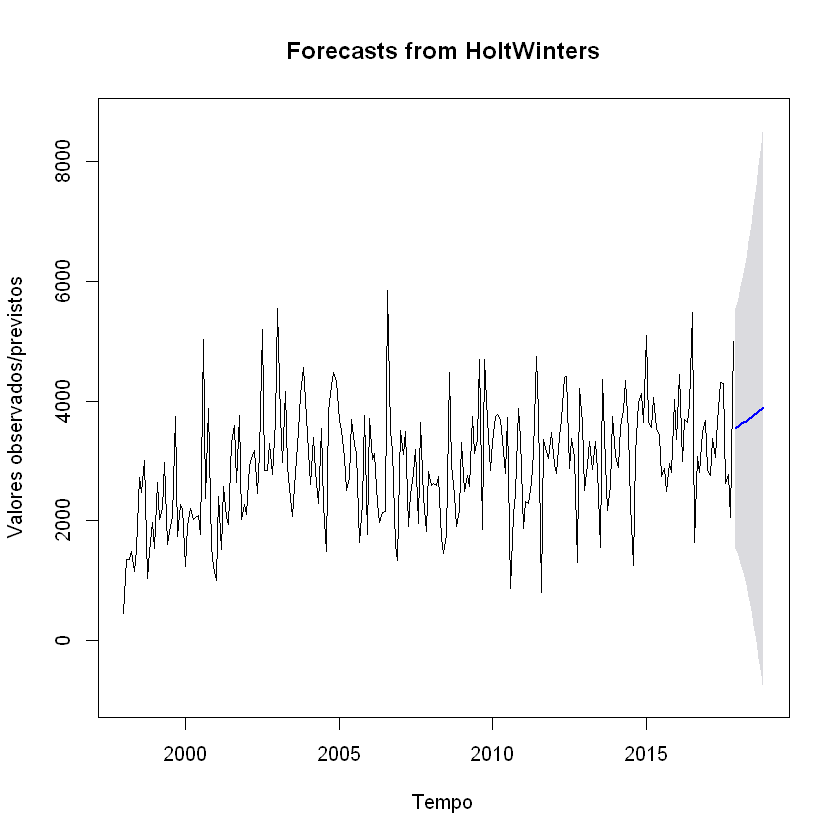

In [41]:
#Visualização da previsão
plot(prev_holt, xlab = "Tempo", ylab = "Valores observados/previstos")

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>

<hr>

<div align=justify>
Por fim, está apresentada adiante outra previsão com o mesmo modelo, contudo com previsão das próximas 24 observações da série temporal. Note-se, tando na visualização anterior quanto na próxima que o valor de previsão é plotado com uma linha em azul representando os valores previstos e em cinza uma área que representa os limites superiores e inferiores da previsão.
</div>

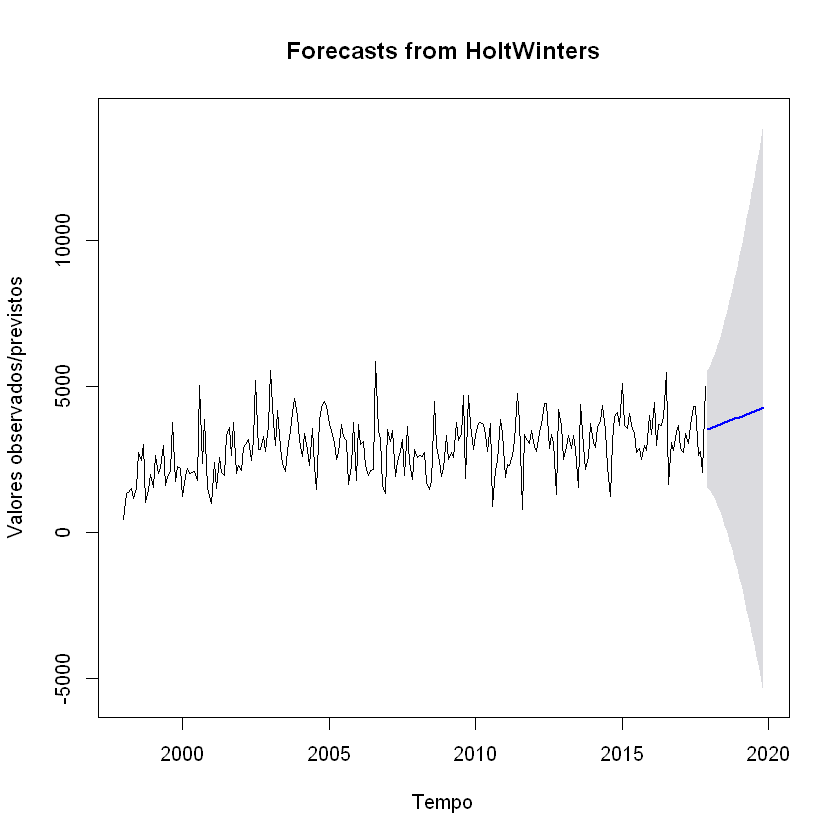

In [42]:
#Previsão de próximas 24 ocorrências
prev_holt <- forecast(ajuste_holt, h=24, level=95)
#Visualização da previsão
plot(prev_holt, xlab = "Tempo", ylab = "Valores observados/previstos")

<a name="agrup"></a><hr>

<p style="text-align: right;"> 
<a href="#menu"> Voltar para o menu 📄 </a>
</p>


<h2> |📄| <u>Agrupamento</u> <a name="agrup"></a> </h2> <br>

<img src="images/agrupamento.png" width="300" height="300"> <br>

<div align=justify>
</div>